Comparison CDF plots to evaluate activation scheme biases

In [16]:
import os, pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', context='talk')


/Users/daniel/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

In [18]:
import plot_utils as pu

exp_name = "MARC_main"
exp_base = exp_name.split("_")[1]

results_df = pu.get_data(exp_name)

main_3
main_4
ARG
MBN


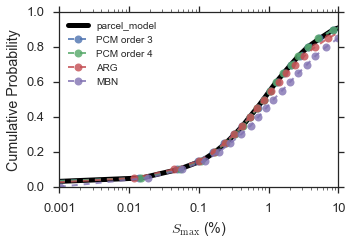

In [19]:
# Smax

var_name = "Smax"
var_label = '$S_\mathrm{max}$ (%)'
lims = 1e-3, 10.
parcel_data = np.power(10., results_df[var_name+"_parcel"])

param_settings = [
    # ( name, label )
    (exp_base+'_3', 'PCM order 3'),
    (exp_base+'_4', 'PCM order 4'),
    ('ARG', 'ARG'),
    ('MBN', 'MBN'),
]

colors = sns.color_palette("deep", len(param_settings))

fig = plt.figure(figsize=(5., 5./(16./10.)))
ax = fig.add_subplot(111)

for i, (param_name, param_label) in enumerate(param_settings):
    print(param_name)
    scheme_data = np.power(10., results_df[var_name+"_"+param_name])
    
    # Mask egregious outlier data
    data_df = pd.DataFrame({'scheme': scheme_data,
                            'parcel': parcel_data})
    
    # Convert to supersaturation in %
    data_df['scheme'] *= 100
    data_df['parcel'] *= 100
    
    # Note that the data is all log data, so we're masking truly outlier
    # points here
    data_df[data_df > 1e10] = np.nan
    data_df[data_df < 0.] = np.nan
    data_df.dropna(inplace=True)
    
    # Be sure to plot parcel data first
    if i == 0:
        line_kws = dict(linestyle='solid', color='k', label='parcel_model',
                        zorder=-10)
        _, _ = pu.plot_cdf(data_df['parcel'], line_kws, ax=ax)

    line_kws = dict(marker='o', linestyle='dashed', ms=8, label=param_label,
                    color=colors[i], alpha=0.8, lw=2)
    _, _ = pu.plot_cdf(data_df['scheme'], line_kws, ax=ax)
    

ax.set_xlim(*lims)
ax.set_xlabel(var_label)

ax.semilogx()
ax.legend(loc='upper left', fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%1g"))


fig_fn = "{}.cdfs.{}".format(var_name, exp_name)
plt.savefig("figs/"+fig_fn+".png", transparent=True, bbox_inches='tight',
            dpi=200)
plt.savefig("figs/"+fig_fn+".pdf", transparent=True, bbox_inches='tight')

main_3
main_4
ARG
MBN


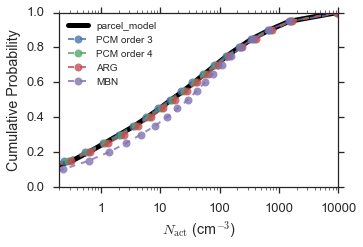

In [20]:
# Neq - derived

var_name = "Nact"
var_label = '$N_\mathrm{act}$ (cm$^{-3}$)'
lims = 2e-1, 1e4
parcel_data = np.power(10., results_df["Neq"+"_parcel"])

param_settings = [
    # ( name, label )
    (exp_base+'_3', 'PCM order 3'),
    (exp_base+'_4', 'PCM order 4'),
    ('ARG', 'ARG'),
    ('MBN', 'MBN'),
]

colors = sns.color_palette("deep", len(param_settings))

fig = plt.figure(figsize=(5., 5./(16./10.)))
ax = fig.add_subplot(111)

for i, (param_name, param_label) in enumerate(param_settings):
    print(param_name)
    scheme_data = np.power(10., results_df["Nderiv_"+param_name])
    
    # Mask egregious outlier data
    data_df = pd.DataFrame({'scheme': scheme_data,
                            'parcel': parcel_data})
    # Note that the data is all log data, so we're masking truly outlier
    # points here
    data_df[data_df > 1e10] = np.nan
#     data_df[data_df < 0.] = np.nan
    data_df.dropna(inplace=True)
    
    # Be sure to plot parcel data first
    if i == 0:
        line_kws = dict(linestyle='solid', color='k', label='parcel_model',
                        zorder=-10)
        _, _ = pu.plot_cdf(data_df['parcel'], line_kws, ax=ax)

    line_kws = dict(marker='o', linestyle='dashed', ms=8, label=param_label,
                    color=colors[i], alpha=0.8, lw=2)
    _, _ = pu.plot_cdf(data_df['scheme'], line_kws, ax=ax)
    
    
ax.set_xlim(*lims)
ax.set_xlabel(var_label)

ax.semilogx()
ax.legend(loc='upper left', fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%1g"))

fig_fn = "{}.cdfs.{}".format(var_name, exp_name)
plt.savefig("figs/"+fig_fn+".png", transparent=True, bbox_inches='tight',
            dpi=200)
plt.savefig("figs/"+fig_fn+".pdf", transparent=True, bbox_inches='tight')

main_3
main_4
ARG
MBN


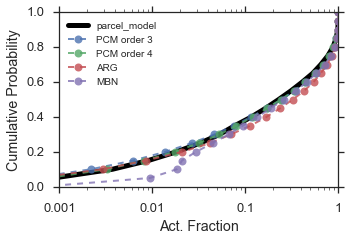

In [21]:
# Activated Fraction

var_name = "actfrac"
var_label = 'Act. Fraction'
lims = 1e-3, 1.

modes = ['ACC', 'MOS', 'MBS']
if exp_name == 'MARC_gCCN':
    modes += ['DST01', 'DST02', 'SSLT01']
total_N = np.sum([10.**results_df['logN_' + mode] for mode in modes],
                 axis=0)
parcel_data = np.power(10., results_df["Neq"+"_parcel"])/total_N


param_settings = [
    # ( name, label )
    (exp_base+'_3', 'PCM order 3'),
    (exp_base+'_4', 'PCM order 4'),
    ('ARG', 'ARG'),
    ('MBN', 'MBN'),
]

colors = sns.color_palette("deep", len(param_settings))

fig = plt.figure(figsize=(5., 5./(16./10.)))
ax = fig.add_subplot(111)

for i, (param_name, param_label) in enumerate(param_settings):
    print(param_name)
    scheme_data = np.power(10., results_df["Nderiv"+"_"+param_name])/\
                  total_N
    
    # Mask egregious outlier data
    data_df = pd.DataFrame({'scheme': scheme_data,
                            'parcel': parcel_data})
    # Note that the data is all log data, so we're masking truly outlier
    # points here
    data_df[data_df > 1e10] = np.nan
    data_df[data_df < 0.] = np.nan
    data_df.dropna(inplace=True)

    # Be sure to plot parcel data first
    if i == 0:
        line_kws = dict(linestyle='solid', color='k', label='parcel_model',
                        zorder=-10)
        _, _ = pu.plot_cdf(data_df['parcel'], line_kws, ax=ax)

    line_kws = dict(marker='o', linestyle='dashed', ms=8, label=param_label,
                    color=colors[i], alpha=0.8, lw=2)
    _, _ = pu.plot_cdf(data_df['scheme'], line_kws, ax=ax)
    
    
ax.set_xlim(*lims)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%1g"))
ax.set_xlabel(var_label)

ax.semilogx()
ax.legend(loc='upper left', fontsize=10)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%1g"))

fig_fn = "{}.cdfs.{}".format(var_name, exp_name)
plt.savefig("figs/"+fig_fn+".png", transparent=True, bbox_inches='tight',
            dpi=200)
plt.savefig("figs/"+fig_fn+".pdf", transparent=True, bbox_inches='tight')

Indicate we're done by "touching" a temporary file

In [22]:
%%bash
date > cdf